Clustering : a type of unsupervised learning : we do not know the answers upfront : typically used to group a bunch of data so that items in the same cluster are similar to each other than to those from different clusters 

Grouping objects by similariy using K-means: \
one of the most popular clustering algorithm used by K-means clustering. It is extremely simple and easy to implement and at the same time , is very computationally efficient. it is a prototype-based clustering technique. two more techniques - hierarchical and density-based clustering technique.

prototype-based clustering - the points in the cluster is represented by a prototype [centroid, the mean of all points in the cluster or medoid, the most frequently occurring element in the cluster]. only drawback is that the k should be determined a priori. An inappropriate cluster number can lead to poor performance. so, the k is to be chosen with care. there are some methods : the elbow plot / silhouette plot. k-means clustering can be used for higher dimensions , here we go through a simple 2D example.

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150,n_features=2, centers=3,cluster_std = 0.5,shuffle=True,random_state=0)
import matplotlib.pyplot as plt

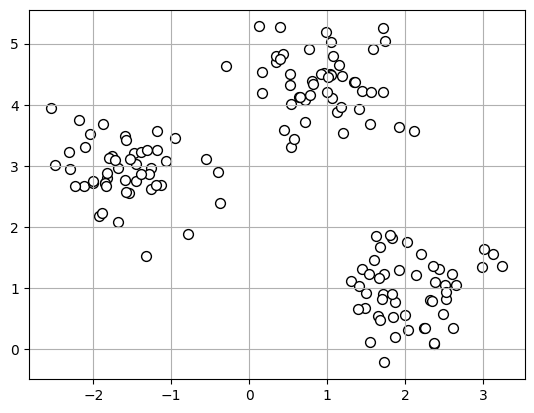

In [3]:
plt.scatter(X[:,0], X[:,1], c='white', marker='o',edgecolor='black',s=50)
plt.grid()
plt.show()

K-means clustering: \
1. Randomly pick k centroids from the sample points as initial clusters. \
2. Assign each sample to the nearest centroid.
3. Move the centroids to the center of the samples assigned to it.
4. Repeat this step till maximum number of iterations or a tolerance level is reached.

In [4]:
X.shape, y.shape

((150, 2), (150,))

In [5]:
#to get this working, need to upgrade threadppoolctl to >3.0
from sklearn.cluster import KMeans

km=  KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-4,random_state=0)
y_km = km.fit_predict(X)


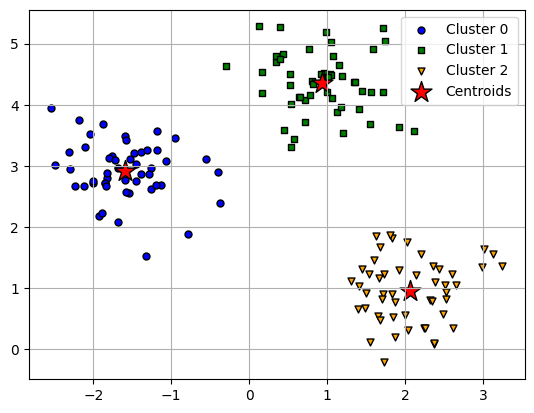

In [6]:
#plot the points
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=25,c='blue',edgecolor='black',marker='o',label='Cluster 0')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=25,c='green',edgecolor='black',marker='s',label='Cluster 1')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=25,c='orange',edgecolor='black',marker='v',label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red',edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Drawbacks of k-means clustering: 
1. specify the number of clusters k apriori
2. Assumption that at least one item per cluster available
3. Clusters do not overlap and are not hierarchical in nature. density based clustering and hierarchical clustering are other types of clustering algos

a smarter way of placing initial cluster centroid using k-means++: 
classic k-means places initial cluster centroids in a random way which could lead to very slow convergence or sometimes no convergence at all. One strategy is to run the k-means multiple times with different random centroids and choose the one with best SSE. another strategy is to set the initial centroids far from each other,this leads to better results . \
algorithm:
1. have an empty set M in which k centroids will be eventually put.
2. randomly select a point $\mu _j$ from input sample and have it as first centroid.
3. Find the minimum squared distance $d(x^{(i)},M)^2$ to any of the centroids in M.
4. Find the next centroid $\mu _p$ from the probability distribution : $\frac{d(\mu _p,M)^2}{\sum _i d(x^{(i)},M)^2}$. 
5. Repeat step 3 and 4 till you get k centroids.
6. proceed with classic k means.

in sklearn, we can go for smarter k++ , by assigning k-means++ to init instead of random


Hard vs soft clustering : \
K-means : hard clustering , each point is assigned to a single cluster. 
there are cases where each point could be assigned to multiple clusters. overlapping clusters?? . this is called soft or fuzzy clustering. a popular example for fuzzy clustering is the soft k-means or fuzzy C-means algorithm.

in k-means, the probability of each point belonging to cluster is simply a boolean value. 1 if it is in cluster k or 0 if not. but in soft clustering or fuzzy C-means algorithm, we assign probabilities as real numbers to each cluster. \
$J_m = \sum _{i=1}^{n} \sum _{j=1}^{k}w^{m(i,j)} \Vert x^{(i)} - \mu ^{(j)} \Vert ^{2} _{2} $. \
the exponent m is the fuzziness coefficient. usually, it is set to value greater than 1 like 2. higher the value of m, lower the value of w(i,j), leading to fuzzier clusters. there is some crazy math equations involved in computation of the weight w (i,j) and the centroid $\mu _j$ 

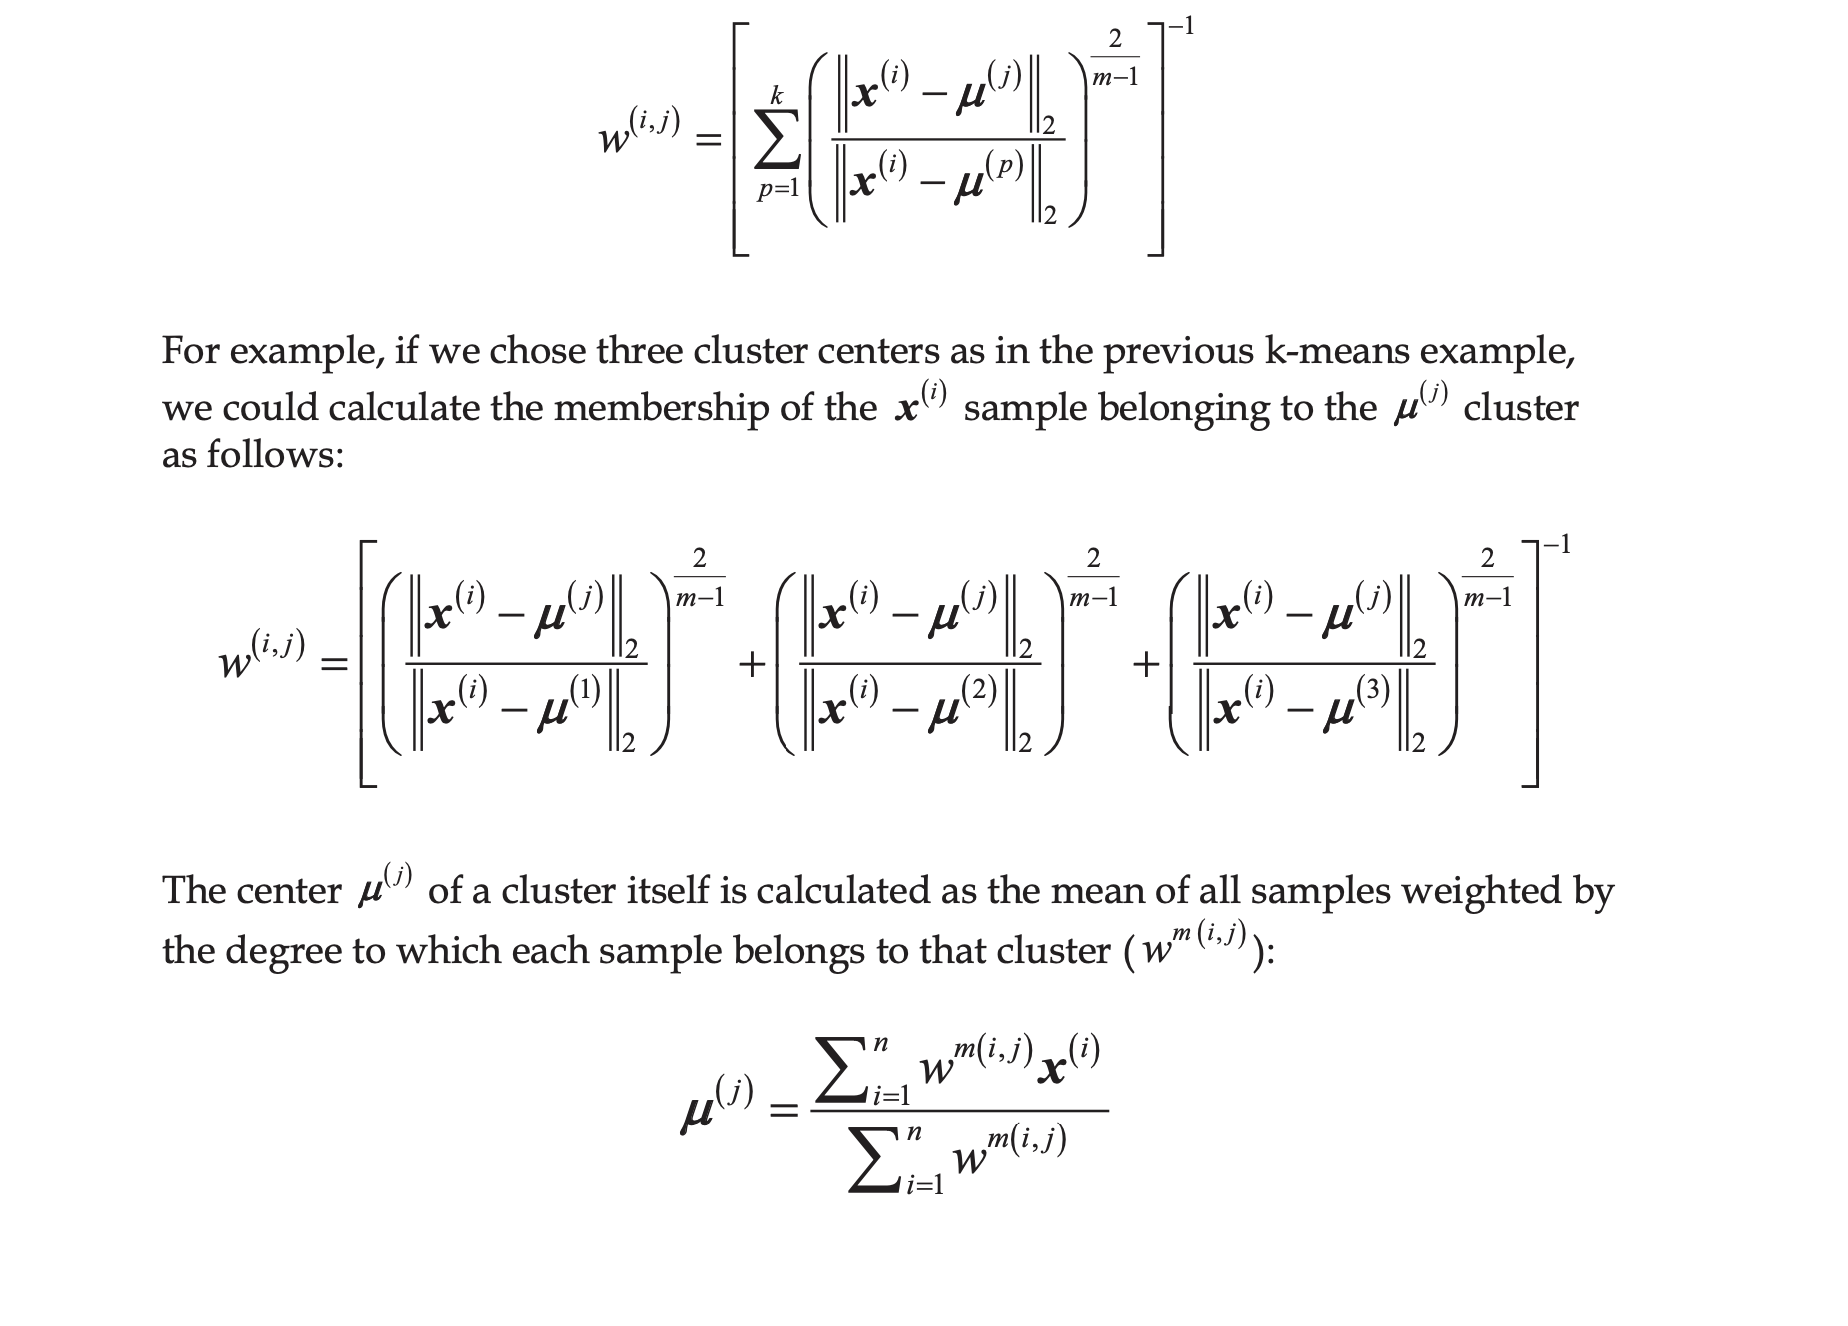

Elbow method to determine the numebr of clusters:
to determine how good the clustering is, we look at the within cluster SSE (distortion). this has to be low to be regarded as good cluster split. in sklearn, this value is readily available as inertia_


In [7]:
km.inertia_

72.47601670996698

intuitive idea is that with increase in k , the within-cluster SSE will decrease. we choose k at that point where there is a steep decrease in within cluster SSE

In [8]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)

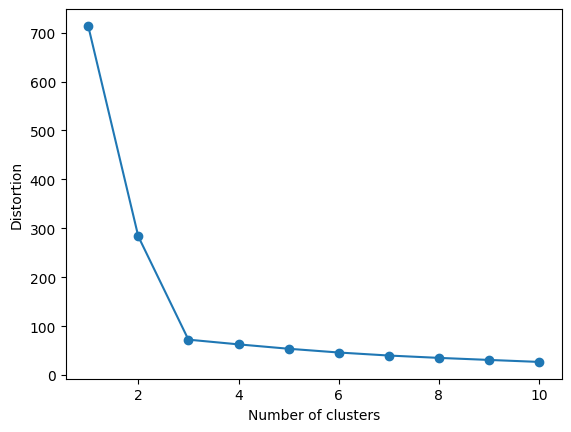

In [9]:
plt.plot(range(1,11),distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

there is a steep decrease from 2 to 3 and then from 3 to 4, we don't see a steep decrease.So. k=3 should be an ideal candidate

Quantifying the quality of clustering using silhouette plots: \
Calculate the cluster cohesion $a^{(i)}$ as the average distance between sample $x^{(i)}$ and all other points in the cluster. \
Calculate the cluster separattion $b^{(i)}$ as the average distance between sample $x^{(i)}$ and all samples in nearest cluster.
Silhoutte coefficeint $s^{(i)} = \frac{b^{(i)} - a^{(i)}}{max (b^{(i)} ,a^{(i)})}$. It is bounded in the region [-1,1]

In [10]:
km = KMeans(n_clusters = 3, init='k-means++', n_init=10,max_iter=300,tol=1e-4,random_state=42)
y_km = km.fit_predict(X)


In [11]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

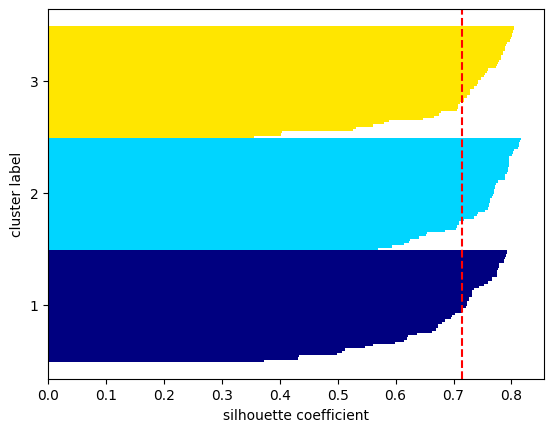

In [12]:

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
sil_scores  = silhouette_samples(X,y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    color = cm.jet(float(i)/n_clusters)
    sil_scores_c=  sil_scores[y_km==c]
    sil_scores_c.sort()
    y_ax_upper += len(sil_scores_c)
    plt.barh(range(y_ax_lower,y_ax_upper),sil_scores_c, height=1.0, edgecolor='none',color=color )
    y_ticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(sil_scores_c)
silhouette_avg = np.mean(sil_scores)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, cluster_labels+1)

plt.ylabel("cluster label")
plt.xlabel('silhouette coefficient')
plt.show()
 

this clustering looks good based on the silhouette plot. we see that the silhouette coefficeints are closer to 0.7

let us now do an experiment where we do the clustering for our blob dataset with only two centroids and see what effect is there on the silhouette plots.

In [13]:
km = KMeans(n_clusters=2, n_init=10, random_state=42, init='k-means++',max_iter=300,tol=1e-4)
y_km  =km.fit_predict(X)


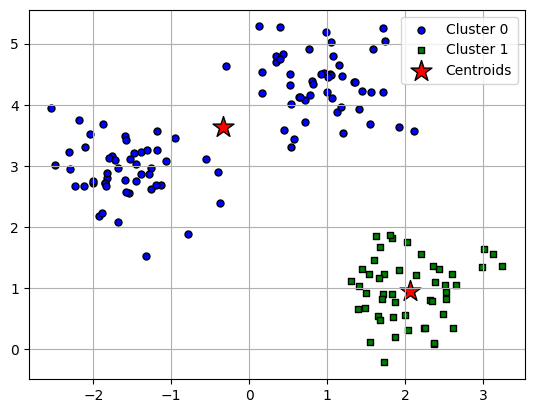

In [14]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=25,c='blue',edgecolor='black',marker='o',label='Cluster 0')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=25,c='green',edgecolor='black',marker='s',label='Cluster 1')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red',edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

the second cluster looks okay, but we see that the first cluster has too many points away from the centroid -> high within cluster SSE [distortion]

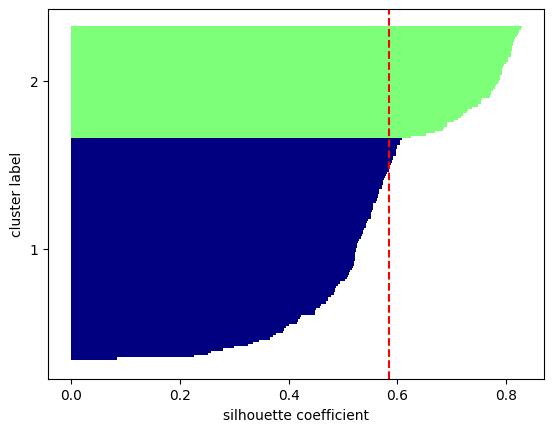

In [15]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
sil_scores  = silhouette_samples(X,y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    color = cm.jet(float(i)/n_clusters)
    sil_scores_c=  sil_scores[y_km==c]
    sil_scores_c.sort()
    y_ax_upper += len(sil_scores_c)
    plt.barh(range(y_ax_lower,y_ax_upper),sil_scores_c, height=1.0, edgecolor='none',color=color )
    y_ticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(sil_scores_c)
silhouette_avg = np.mean(sil_scores)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, cluster_labels+1)

plt.ylabel("cluster label")
plt.xlabel('silhouette coefficient')
plt.show()

we see that the average silhouette score has dropped down below 0.6 and the individual cluster silhouette scores are also very bad. thus, n_clusters=3 does a good job compared to n_clusters=4

Organizing clusters as a hierarchical tree:
Alternative to prototype clustering. advantage of hierarchical clustering is that it allows to draw dendrograms for better visualization and decision making adopted by algo and there is no need to give the number of clusters upfront.

Two approaches to hierarchical clustering : 
Divisive clustering : consider the entier dataset as one cluster, then divide the samples into smaller and smaller clusters till you reach a point where every point is a cluster
Agglomerative clustering : consider all points as clusters, then merge them together till you reach a point where all points together form a cluster

Agglomerative clustering -> four algorithms -> single linkage , complete linkage, average linkage, ward's linkage. \
single linkage - pick the most similar members [nearest] of two clusters and merge the clusters with minimum similar member distance. \
complete linkage - same procedure with distant members [dissimilar]. \
average linkage - same procedure with minimum average distance of all cluster members. \
ward linkage - merge clusters in such a way that the total within cluster SSE reduces. 

Complete agglomerative hierarchical clustering : 
1. Construct the distance matrix of all samples.
2. represent each data point as a singleton cluster
3. merge the two closest clusters based on dissimilar distances
4. update the distance matrix
5. repeat steps 2-4

In [16]:
#generation of dataset
np.random.seed(42)
import pandas as pd

In [17]:
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)

In [18]:
df

,X,Y,Z
ID_0,3.745401,9.507143,7.319939
ID_1,5.986585,1.560186,1.559945
ID_2,0.580836,8.661761,6.011150
ID_3,7.080726,0.205845,9.699099
ID_4,8.324426,2.123391,1.818250


In [21]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,10.067500,3.527332,10.163608,10.283767
ID_1,10.067500,0.000000,9.973350,8.323293,2.418558
ID_2,3.527332,9.973350,0.000000,11.285037,10.967857
ID_3,10.163608,8.323293,11.285037,0.000000,8.205581
ID_4,10.283767,2.418558,10.967857,8.205581,0.000000


In [24]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [25]:
row_clusters= linkage(df.values,method='complete',metric='euclidean')
row_clusters

array([[ 1.        ,  4.        ,  2.41855823,  2.        ],
       [ 0.        ,  2.        ,  3.52733207,  2.        ],
       [ 3.        ,  5.        ,  8.32329273,  3.        ],
       [ 6.        ,  7.        , 11.28503669,  5.        ]])

let us try to understand how the clustering is happening. first 1 and 4 are grouped together because they have lowest distance. so they form cluster 5 apart of clusters 0 to 4 already there. next is the cluster 6 containing 0 and 2.their distance is also low. \
next we cluster 3 and 5 which already contains 1 and 4. so, we calculate the most dissimilar member between cluster 3 containign just 3 and cluster 5 containing 1 and 4. so, we form a new cluster 7 containing 1, 4, 3. 
then we turn to clusters 6 and 7. cluster 6 has 0 and 2, cluster 7 has 1,4,3. the distance between dissimilar members is d(0,2). finally cluster 8 has 5 elements i.e all the points

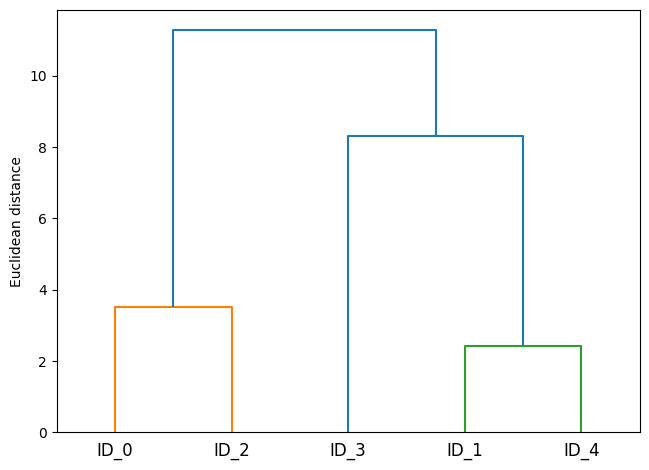

In [26]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters,
                      labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [27]:
df

,X,Y,Z
ID_0,3.745401,9.507143,7.319939
ID_1,5.986585,1.560186,1.559945
ID_2,0.580836,8.661761,6.011150
ID_3,7.080726,0.205845,9.699099
ID_4,8.324426,2.123391,1.818250


/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_5101/3158486453.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_5101/3158486453.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


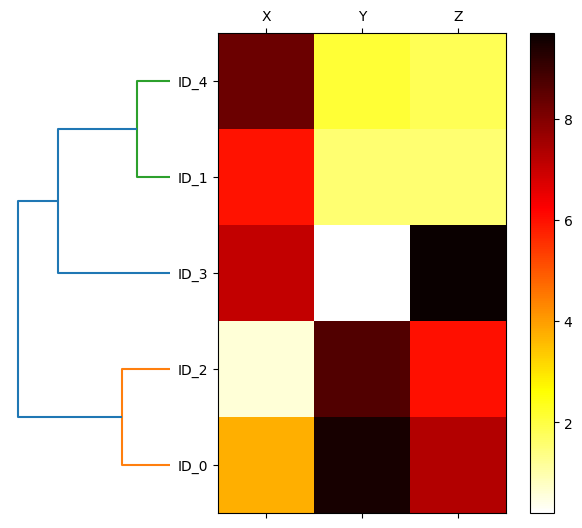

In [36]:
#attaching dendograms to heatmap
fig = plt.figure(figsize=(8,8), facecolor='white') # create the canvas for plot
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
axm = fig.add_axes([0.23,0.1,0.6,0.6])
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
cax = axm.matshow(df_rowclust,
             interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
     i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

DBSCAN : Locating Regions of high density \
Density Based Spatial Clustering of Applications with Noise. \
1.Does not make assumptions about the clusters being spherical.
2. Need not worry about cut-off point like hierarchical clustering.

a point is a core point if there are minimum of n_pts within a distance of $\epsilon$ around it.
a point is a border point if there are not enough pts around it within the specified distance but it is within a distance of $\epsilon$ from a core point. All other points are noise points


1. Form a separate cluster for each core point or a group of connected core points.
2. Assign each border point to the closest core point
3. Other points are simply noise points

Features of DBSCAN:
no one point mapping to one cluster only
no cut-off point or pre-defined num_cluster required like prototype or hierarchical clustering
removes outliers from the dataset while clustering

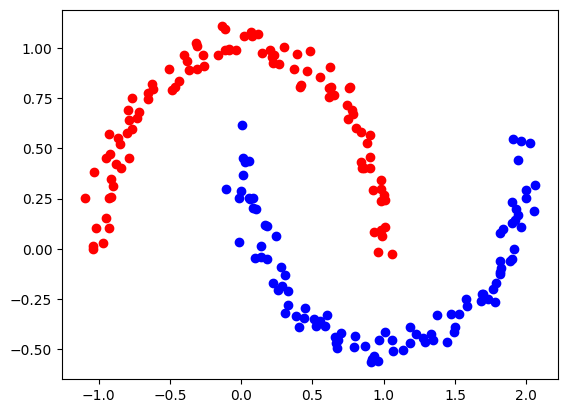

In [44]:
#half moon dataset
from sklearn.datasets import make_moons
colors = ["red","blue"]
X,y = make_moons(n_samples=200, noise=0.05, random_state=42)
plt.scatter(X[y==0,0], X[y==0,1],c=colors[0])
plt.scatter(X[y==1,0], X[y==1,1],c=colors[1])
plt.show()


the above shape is a weird one and let us see if the k-means clustering is able to cluster these perfectly with its sphecial clustering approach, and also linkage based clustering with its hierarchical approach

In [45]:
from sklearn.cluster import AgglomerativeClustering

/Users/divyeshkanagavel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divyeshkanagavel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


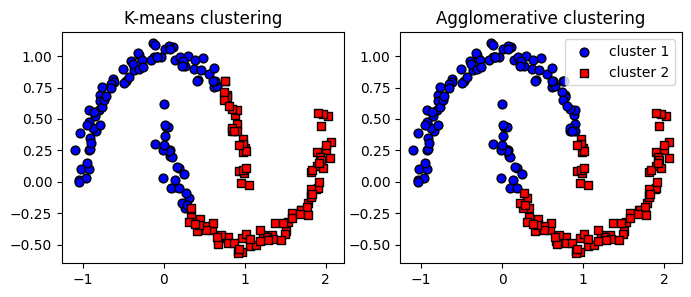

In [46]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
km = KMeans(n_clusters=2,random_state=42,init='k-means++')
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],X[y_km==0,1],c='blue', edgecolor='black',marker='o',s=40, label='cluster 1')
ax1.scatter(X[y_km==1,0],X[y_km==1,1],c='red', edgecolor='black',marker='s',s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='euclidean')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],X[y_ac==0,1],c='blue', edgecolor='black',marker='o',s=40, label='cluster 1')
ax2.scatter(X[y_ac==1,0],X[y_ac==1,1],c='red', edgecolor='black',marker='s',s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

both k-means clustering with their own logic of clustering are unable to separate the clusters the way we wanted.

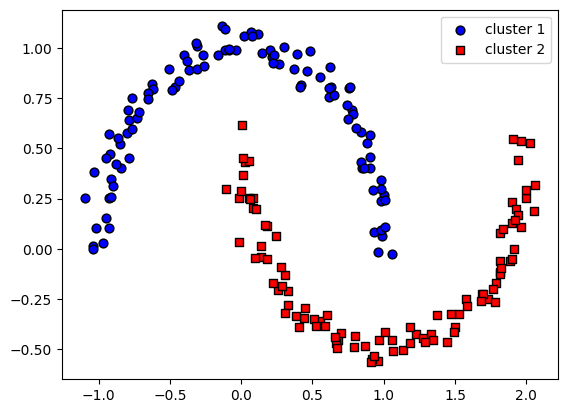

In [47]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2, min_samples=5,metric='euclidean')
y_db = dbs.fit_predict(X)
plt.scatter(X[y_db==0,0], X[y_db==0,1], color='blue',edgecolor='black', marker='o', s=40,label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], color='red', edgecolor='black',marker='s',s=40, label='cluster 2')
plt.legend()
plt.show()

DBSCAN actually does a very good job, its density based clustering indeed separates the cluster like the make_moons dataset wanted. 

Disadvantages of DBSCAN: 
With increasing number of dimensions and fixed training samples, the curse of dimensionality increases. especially true if euclidean metric is used. though this is not unique to dbscan, it can occur to k-means and hierarchical clustering.
also dbscan is sensitive to hyperparamters $\epsilon$ and min_samples.they need to be chosen properly for effective clustering.

In practice, the clustering algorithm to choose depends on the application. Based on the application, hyperparameters like distance metric etc are chosen. 
With higher dimensionality, it is harder to visualize.hence we use dimensionality reduction techniques like Principal Component analysis, RBF Kernel analysis etc. 


There is another clustering technique called graph-based clustering with spectral clustering being the most prominent graph-based clustering. They employ eigen decomposition of a distance matrix to filter out points which are closest and thus form clusters